In [131]:
import pandas as pd
from matplotlib import pyplot as plt
from IPython.display import display
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
    mean_absolute_error,
    mean_squared_error,
    r2_score,)

cars = pd.read_csv('data/Cars93.csv')

In [132]:
cars

,Unnamed: 0,Manufacturer,Model,Type,Min.Price,Price,Max.Price,MPG.city,MPG.highway,AirBags,...,Passengers,Length,Wheelbase,Width,Turn.circle,Rear.seat.room,Luggage.room,Weight,Origin,Make
0,1,Acura,Integra,Small,12.9,15.9,18.8,25,31,None,...,5,177,102,68,37,26.5,11.0,2705,non-USA,Acura Integra
1,2,Acura,Legend,Midsize,29.2,33.9,38.7,18,25,Driver & Passenger,...,5,195,115,71,38,30.0,15.0,3560,non-USA,Acura Legend
2,3,Audi,90,Compact,25.9,29.1,32.3,20,26,Driver only,...,5,180,102,67,37,28.0,14.0,3375,non-USA,Audi 90
3,4,Audi,100,Midsize,30.8,37.7,44.6,19,26,Driver & Passenger,...,6,193,106,70,37,31.0,17.0,3405,non-USA,Audi 100
4,5,BMW,535i,Midsize,23.7,30.0,36.2,22,30,Driver only,...,4,186,109,69,39,27.0,13.0,3640,non-USA,BMW 535i
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
88,89,Volkswagen,Eurovan,Van,16.6,19.7,22.7,17,21,None,...,7,187,115,72,38,34.0,NaN,3960,non-USA,Volkswagen Eurovan
89,90,Volkswagen,Passat,Compact,17.6,20.0,22.4,21,30,None,...,5,180,103,67,35,31.5,14.0,2985,non-USA,Volkswagen Passat
90,91,Volkswagen,Corrado,Sporty,22.9,23.3,23.7,18,25,None,...,4,159,97,66,36,26.0,15.0,2810,non-USA,Volkswagen Corrado
91,92,Volvo,240,Compact,21.8,22.7,23.5,21,28,Driver only,...,5,190,104,67,37,29.5,14.0,2985,non-USA,Volvo 240


### Linear

In [106]:
from sklearn.linear_model import LinearRegression
cols = ['Weight', 'Unnamed: 0']
y = cars['MPG.city']
X = cars[cols]
li_model = LinearRegression()

In [107]:
results = train_test_split(X, y, random_state=42, test_size=0.333 )

X_train, X_test, y_train, y_test = results

In [108]:
li_model.fit(X_train, y_train)
print(li_model.score(X_train, y_train))
print(li_model.score(X_test, y_test))

0.6940930002661236
0.7398347177829948


In [109]:
li_model_r2 = r2_score(y_test, li_model.predict(X_test))
li_model_r2

0.7398347177829948

In [110]:
mean_absolute_error(y_test, li_model.predict(X_test))

1.9865836732792688

In [111]:
mean_squared_error(y_test, li_model.predict(X_test))

6.409108107393737

### Ridge

In [112]:
from sklearn.linear_model import Ridge
cols = ['Weight', 'Unnamed: 0']
y = cars['MPG.city']
X = cars[cols]
r_model = Ridge(alpha=424)

Ridge(alpha=424)

In [113]:
results = train_test_split(X, y, random_state=42, test_size=0.333 )

X_train, X_test, y_train, y_test = results

In [114]:
r_model.fit(X_train, y_train)
print(r_model.score(X_train, y_train))
print(r_model.score(X_test, y_test))

0.6940927859539272
0.7399610448500857


In [115]:
r_model_r2 = r2_score(y_test, r_model.predict(X_test))
r_model_r2

0.7399610448500857

In [116]:
mean_absolute_error(y_test, r_model.predict(X_test))

1.9853523405029336

In [117]:
mean_squared_error(y_test, r_model.predict(X_test))

6.4059960709875865

### Lasso

In [118]:
from sklearn import linear_model
cols = ['Weight', 'Unnamed: 0']
y = cars['MPG.city']
X = cars[cols]
l_model = linear_model.Lasso(alpha=424)

Lasso(alpha=424)

In [119]:
results = train_test_split(X, y, random_state=42, test_size=0.333 )

X_train, X_test, y_train, y_test = results

In [120]:
l_model.fit(X_train, y_train)
print(l_model.score(X_train, y_train))
print(l_model.score(X_test, y_test))

0.6764612429627396
0.7724291245773455


In [121]:
l_model_r2 = r2_score(y_test, l_model.predict(X_test))
l_model_r2

0.7724291245773455

In [122]:
mean_absolute_error(y_test, l_model.predict(X_test))

1.752994966047418

In [123]:
mean_squared_error(y_test, l_model.predict(X_test))

5.60615286655143

### R2 Comparison
#### X_test, y_test R2

In [124]:
print(f'''
Linear Model r2: {li_model_r2}

Ridge Model r2: {r_model_r2} 

Lasso Model r2: {l_model_r2}''')


Linear Model r2: 0.7398347177829948

Ridge Model r2: 0.7399610448500857 

Lasso Model r2: 0.7724291245773455


#### X_train, y_train R2

In [126]:
print(f'''
Linear Model r2: {li_model.score(X_train, y_train)}

Ridge Model r2 {r_model.score(X_train, y_train)} 

Lasso Model r2: {l_model.score(X_train, y_train)}''')


Linear Model r2: 0.6940930002661236

Ridge Model r2 0.6940927859539272 

Lasso Model r2: 0.6764612429627396


### Coefficient Comparison

In [102]:
print(f'''
Linear Model Coef: {li_model.coef_}

Ridge Model Coef {r_model.coef_} 

Lasso Model Coef: {l_model.coef_}''')


Linear Model Coef: [-0.00860179 -0.01027492]

Ridge Model Coef [-0.00860017 -0.01016986] 

Lasso Model Coef: [-0.00719077 -0.        ]


### Visualization

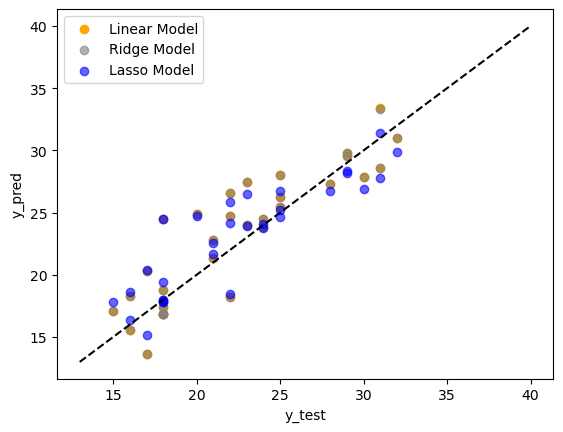

In [129]:
plt.scatter(y_test, li_model.predict(X_test), label='Linear Model', color='orange')
plt.scatter(y_test, r_model.predict(X_test), label='Ridge Model', color='grey', alpha=0.6);
plt.scatter(y_test, l_model.predict(X_test), label='Lasso Model', color='blue', alpha=0.6);

plt.plot([13, 40], [13, 40], color='black', linestyle='--')

plt.xlabel('y_test')

plt.ylabel('y_pred')

plt.legend();